In [110]:
# aqui vamos treinar os dados de faturamento do RJ com svm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [111]:
# carregando os dados
clean_data_rj = pd.read_excel('../Data/clean_data_rj.xlsx')

In [112]:
clean_data_rj.head()

,codigo,nome,cidade,estado,população,popAte9,popDe10a14,popDe15a19,popDe20a24,popDe25a34,...,domiciliosE,rendaMedia,faturamento,potencial,modaDomicilios,modaPopulação,rendaTotal,popMaisDe15,popMenosDe15,rendaMediaMaisDe15
0,3304557060,Abolição,Rio de Janeiro,RJ,11676,1027,483,688,800,1675,...,304,2501,932515,Médio,domiciliosB2,popMaisDe60,10876849,10166,1510,1069.924159
1,3304557138,Acari,Rio de Janeiro,RJ,27564,5131,2188,2697,2630,4810,...,2506,931,588833,Baixo,domiciliosE,popDe35a49,7867881,20245,7319,388.633292
2,3304557057,Água Santa,Rio de Janeiro,RJ,9003,883,399,597,762,1755,...,254,2391,874200,Baixo,domiciliosB2,popDe35a49,6333759,7721,1282,820.328843
3,3304557031,Alto Da Boa Vista,Rio de Janeiro,RJ,9606,1072,538,660,685,1317,...,286,3727,912226,Médio,domiciliosC1,popDe35a49,11754958,7996,1610,1470.104802
4,3304557125,Anchieta,Rio de Janeiro,RJ,57222,7677,3774,4892,4600,8660,...,3261,1380,553020,Médio,domiciliosC2,popDe35a49,25910880,45771,11451,566.098184


In [113]:
# temp cell
# drop columns that we don't need
# drop column nome, cidade, estado
clean_data_rj.drop(['nome', 'cidade', 'estado','modaDomicilios','modaPopulação'], axis=1, inplace=True)

# convert potencial Baixo, Médio, Alto to 0, 1, 2
clean_data_rj['potencial'] = clean_data_rj['potencial'].map({'Baixo': 0, 'Médio': 1, 'Alto': 2})

Mean Squared Error: 14501540862.371286
Mean Absolute Error: 79621.95535531883
R2 Score: 0.9297816887028565


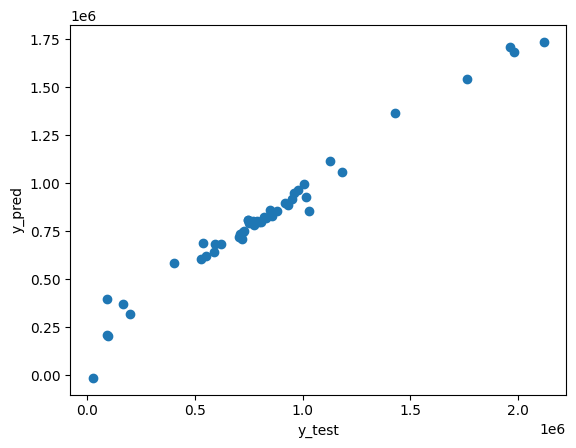

/tmp/ipykernel_3638/3342851887.py:37: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred), bins=25)


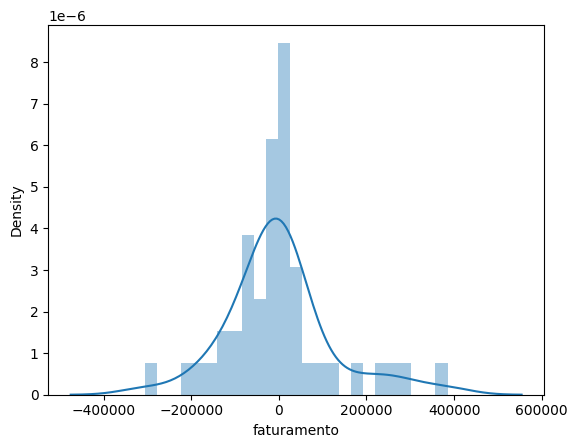

In [114]:
# separando os dados em treino e teste
X = clean_data_rj.drop('faturamento', axis=1)
y = clean_data_rj['faturamento']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

# pre-processando os dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# treinando o modelo
from sklearn.svm import SVR

svr = SVR(C=10000, coef0=0.2, degree=1, epsilon=0.7, gamma=1, kernel='poly')
svr.fit(X_train, y_train)

# fazendo as previsões
y_pred = svr.predict(X_test)

# avaliando o modelo
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# plotando os resultados
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

# plotando os resíduos
sns.distplot((y_test - y_pred), bins=25)
plt.show()


Os resíduos estão distribuídos de forma aleatória em torno de zero, o que indica que o modelo está adequado.

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV 1/5] END C=1, coef0=0.0, degree=1, epsilon=0.3, gamma=1, kernel=poly;, score=0.001 total time=   0.0s
[CV 2/5] END C=1, coef0=0.0, degree=1, epsilon=0.3, gamma=1, kernel=poly;, score=-0.037 total time=   0.0s
[CV 3/5] END C=1, coef0=0.0, degree=1, epsilon=0.3, gamma=1, kernel=poly;, score=-0.005 total time=   0.0s
[CV 4/5] END C=1, coef0=0.0, degree=1, epsilon=0.3, gamma=1, kernel=poly;, score=-0.135 total time=   0.0s
[CV 5/5] END C=1, coef0=0.0, degree=1, epsilon=0.3, gamma=1, kernel=poly;, score=-0.002 total time=   0.0s
[CV 1/5] END C=1, coef0=0.0, degree=1, epsilon=0.3, gamma=0.1, kernel=poly;, score=-0.000 total time=   0.0s
[CV 2/5] END C=1, coef0=0.0, degree=1, epsilon=0.3, gamma=0.1, kernel=poly;, score=-0.037 total time=   0.0s
[CV 3/5] END C=1, coef0=0.0, degree=1, epsilon=0.3, gamma=0.1, kernel=poly;, score=-0.006 total time=   0.0s
[CV 4/5] END C=1, coef0=0.0, degree=1, epsilon=0.3, gamma=0.1, kernel=poly;

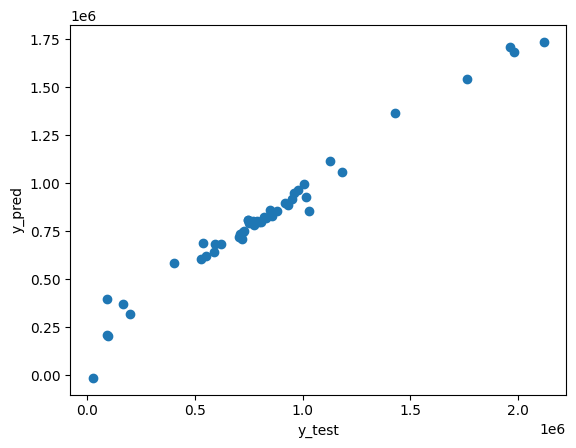

In [115]:
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 10, 100, 1000, 10000,12000], 'gamma': [1, 0.1, 0.01], 'kernel': ['poly'], 'epsilon': [0.3, 0.4, 0.5,0.6,0.7], 'degree': [1, 2], 'coef0': [0.0, 0.1, 0.2]}
grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_index_)
print(grid.scorer_)
print(grid.n_splits_)
print(grid.refit_time_)
print(grid.cv_results_)
print(grid.predict(X_test))

# r2 score
print('R2 Score:', r2_score(y_test, grid.predict(X_test)))

# erros
print('Mean Squared Error:', mean_squared_error(y_test, grid.predict(X_test)))
print('Mean Absolute Error:', mean_absolute_error(y_test, grid.predict(X_test)))

# plotando os resultados
plt.scatter(y_test, grid.predict(X_test))
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()


In [118]:
print(grid.best_params_)
print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_index_)
print(grid.scorer_)

{'C': 10000, 'coef0': 0.2, 'degree': 1, 'epsilon': 0.7, 'gamma': 1, 'kernel': 'poly'}
SVR(C=10000, coef0=0.2, degree=1, epsilon=0.7, gamma=1, kernel='poly')
0.8656360055927987
432
<function _passthrough_scorer at 0x7f716148d000>
